In [33]:
import PySimpleGUI as sg
import openpyxl

# Função para criar uma tabela com base nos dados e cabeçalhos
def criar_tabela(data, headings):
    return sg.Table(values=data, headings=headings, auto_size_columns=True, display_row_numbers=True,vertical_scroll_only = False,
                    justification='center', num_rows=10, alternating_row_color='lightblue', key='-TABLE-', max_col_width=60,
                    def_col_width=20,  expand_x =True , expand_y= True, text_color="black")

# Função para criar uma nova janela com a tabela atualizada
def criar_janela_tabela(data, headings):
    layout = [
        [criar_tabela(data, headings)],
        [sg.Text("Nome:"), sg.InputText(key='-NOME-')],
        [sg.Text("Idade:"), sg.InputText(key='-IDADE-')],
        [sg.Text("Sexo:"), sg.InputText(key='-SEXO-')],
        [sg.Button("Adicionar Linha"), sg.Button("Adicionar Coluna"), sg.Button("Carregar Dados XLSX"), sg.Button("Sair")],
    ]
    return sg.Window("Adicionar Linhas e Colunas", layout, finalize=True)

# Carregar dados iniciais da tabela
data = [
    ["Alice", 25, "F"],
    ["Bob", 30, "M"],
    ["Charlie", 22, "M"],
    ["David", 28, "M"],
    ["Eva", 35, "F"],
]

# Cabeçalhos das colunas
headings = ["Nome", "Idade", "Sexo"]

# Crie a janela inicial com a tabela
window = criar_janela_tabela(data, headings)

# Função para adicionar uma linha à tabela
def adicionar_linha(nome, idade, sexo):
    global data
    data.append([nome, idade, sexo])
    window['-TABLE-'].update(values=data)

# Função para adicionar uma coluna à tabela
def adicionar_coluna(titulo):
    global data, headings, window
    headings.append(titulo)
    for row in data:
        row.append('')
    # Feche a janela atual
    window.close()
    # Crie uma nova janela com a tabela atualizada
    window = criar_janela_tabela(data, headings)

# Função para carregar dados de um arquivo XLSX
def carregar_dados_xlsx():
    global data, headings, window
    # Abra o arquivo XLSX
    filename = sg.popup_get_file("Selecione um arquivo XLSX", file_types=(("Arquivos XLSX", "*.xlsx"),))
    if filename:
        try:
            workbook = openpyxl.load_workbook(filename)
            worksheet = workbook.active
            data = []
            headings = []
            for row_idx, row in enumerate(worksheet.iter_rows(values_only=True)):
                if row_idx == 0:
                    # Primeira linha contém cabeçalhos
                    headings = list(row)
                else:
                    data.append(list(row))
            window.close()
            window = criar_janela_tabela(data, headings)
        except Exception as e:
            sg.popup_error(f"Erro ao carregar dados do arquivo XLSX: {str(e)}")

# Loop de eventos
while True:
    event, values = window.read()

    if event == sg.WINDOW_CLOSED or event == "Sair":
        break
    elif event == "Adicionar Linha":
        nome = values['-NOME-']
        idade = values['-IDADE-']
        sexo = values['-SEXO-']
        adicionar_linha(nome, idade, sexo)
        window['-NOME-'].update('')
        window['-IDADE-'].update('')
        window['-SEXO-'].update('')
    elif event == "Adicionar Coluna":
        titulo_coluna = sg.popup_get_text("Digite o título da coluna:")
        if titulo_coluna:
            adicionar_coluna(titulo_coluna)
    elif event == "Carregar Dados XLSX":
        carregar_dados_xlsx()

# Feche a janela
window.close()


In [34]:
import PySimpleGUI as sg
import openpyxl

# Função para criar uma tabela com base nos dados e cabeçalhos
def criar_tabela(data, headings):
    return sg.Table(values=data, headings=headings, auto_size_columns=True, display_row_numbers=True,vertical_scroll_only = False,
                    justification='center', num_rows=10, alternating_row_color='lightblue', key='-TABLE-', max_col_width=60,
                    def_col_width=20,  expand_x =True , expand_y= True, text_color="black", enable_events=True)

# Função para criar uma nova janela com a tabela atualizada
def criar_janela_tabela(data, headings):
    layout = [
        [criar_tabela(data, headings)],
        [sg.Text("Nome:"), sg.InputText(key='-NOME-')],
        [sg.Text("Idade:"), sg.InputText(key='-IDADE-')],
        [sg.Text("Sexo:"), sg.InputText(key='-SEXO-')],
        [sg.Button("Adicionar Linha"), sg.Button("Adicionar Coluna"), sg.Button("Carregar Dados XLSX"), sg.Button("Sair")],
    ]
    return sg.Window("Adicionar Linhas e Colunas", layout, finalize=True)

# Carregar dados iniciais da tabela
data = [
    ["Alice", 25, "F"],
    ["Bob", 30, "M"],
    ["Charlie", 22, "M"],
    ["David", 28, "M"],
    ["Eva", 35, "F"],
]

# Cabeçalhos das colunas
headings = ["Nome", "Idade", "Sexo"]

# Crie a janela inicial com a tabela
window = criar_janela_tabela(data, headings)

# Função para adicionar uma linha à tabela
def adicionar_linha(nome, idade, sexo):
    global data
    data.append([nome, idade, sexo])
    window['-TABLE-'].update(values=data)

# Função para adicionar uma coluna à tabela
def adicionar_coluna(titulo):
    global data, headings, window
    headings.append(titulo)
    for row in data:
        row.append('')
    # Feche a janela atual
    window.close()
    # Crie uma nova janela com a tabela atualizada
    window = criar_janela_tabela(data, headings)

# Função para carregar dados de um arquivo XLSX
def carregar_dados_xlsx():
    global data, headings, window
    # Abra o arquivo XLSX
    filename = sg.popup_get_file("Selecione um arquivo XLSX", file_types=(("Arquivos XLSX", "*.xlsx"),))
    if filename:
        try:
            workbook = openpyxl.load_workbook(filename)
            worksheet = workbook.active
            data = []
            headings = []
            for row_idx, row in enumerate(worksheet.iter_rows(values_only=True)):
                if row_idx == 0:
                    # Primeira linha contém cabeçalhos
                    headings = list(row)
                else:
                    data.append(list(row))
            window.close()
            window = criar_janela_tabela(data, headings)
        except Exception as e:
            sg.popup_error(f"Erro ao carregar dados do arquivo XLSX: {str(e)}")

# Loop de eventos
while True:
    event, values = window.read()

    if event == sg.WINDOW_CLOSED or event == "Sair":
        break
    elif event == "Adicionar Linha":
        nome = values['-NOME-']
        idade = values['-IDADE-']
        sexo = values['-SEXO-']
        adicionar_linha(nome, idade, sexo)
        window['-NOME-'].update('')
        window['-IDADE-'].update('')
        window['-SEXO-'].update('')
    elif event == "Adicionar Coluna":
        titulo_coluna = sg.popup_get_text("Digite o título da coluna:")
        if titulo_coluna:
            adicionar_coluna(titulo_coluna)
    elif event == "Carregar Dados XLSX":
        carregar_dados_xlsx()
    elif event == '-TABLE-':
        row, col = values['-TABLE-']
        if row and col:
            # Atualize o valor na tabela com o valor editado
            data[row][col] = values[event]

# Feche a janela
window.close()


ValueError: not enough values to unpack (expected 2, got 1)

In [35]:
import PySimpleGUI as sg
import random, string

# ------ Some functions to help generate data for the table ------
def word():
    return ''.join(random.choice(string.ascii_lowercase) for i in range(10))
def number(max_val=1000):
    return random.randint(0, max_val)

def make_table(num_rows, num_cols):
    data = [[j for j in range(num_cols)] for i in range(num_rows)]
    data[0] = [word() for _ in range(num_cols)]
    for i in range(0, num_rows):
        data[i] = [i, word(), *[number() for i in range(num_cols - 1)]]
    return data

def edit_cell(window, key, row, col, justify='left'):

    global textvariable, edit

    def callback(event, row, col, text, key):
        global edit
        widget = event.widget
        if key == 'Return':
            text = widget.get()
            print(text)
        widget.destroy()
        widget.master.destroy()
        values = list(table.item(row, 'values'))
        values[col] = text
        table.item(row, values=values)
        edit = False

    if edit or row <= 0:
        return

    edit = True
    root = window.TKroot
    table = window[key].Widget

    text = table.item(row, "values")[col]
    x, y, width, height = table.bbox(row, col)

    frame = sg.tk.Frame(root)
    frame.place(x=x, y=y, anchor="nw", width=width, height=height)
    textvariable = sg.tk.StringVar()
    textvariable.set(text)
    entry = sg.tk.Entry(frame, textvariable=textvariable, justify=justify)
    entry.pack()
    entry.select_range(0, sg.tk.END)
    entry.icursor(sg.tk.END)
    entry.focus_force()
    entry.bind("<Return>", lambda e, r=row, c=col, t=text, k='Return':callback(e, r, c, t, k))
    entry.bind("<Escape>", lambda e, r=row, c=col, t=text, k='Escape':callback(e, r, c, t, k))

def main_example1():
    global edit

    edit = False
    # ------ Make the Table Data ------
    # sg.Print('Creating table...')
    data = make_table(num_rows=1_000, num_cols=6)
    # headings = [str(data[0][x])+'     ..' for x in range(len(data[0]))]
    headings = [f'Col {col}' for col in range(len(data[0]))]
    # sg.Print('Done creating table.  Creating GUI...')
    sg.set_options(dpi_awareness=True)
    layout = [[sg.Table(values=data, headings=headings, max_col_width=25,
                        auto_size_columns=True,
                        # display_row_numbers=True,
                        justification='right',
                        num_rows=20,
                        alternating_row_color=sg.theme_button_color()[1],
                        key='-TABLE-',
                        # selected_row_colors='red on yellow',
                        # enable_events=True,
                        # select_mode=sg.TABLE_SELECT_MODE_BROWSE,
                        expand_x=True,
                        expand_y=True,
                        enable_click_events=True,  # Comment out to not enable header and other clicks
                        )],
              [sg.Button('Read'), sg.Button('Double'), sg.Button('Change Colors')],
              [sg.Text('Cell clicked:'), sg.T(k='-CLICKED-')]]


    window = sg.Window('Table Element - Example 1', layout, resizable=True, finalize=True)

    while True:
        event, values = window.read()
        if event in (sg.WIN_CLOSED, 'Exit'):
            break
        elif isinstance(event, tuple):
            cell = row, col = event[2]
            window['-CLICKED-'].update(cell)
            edit_cell(window, '-TABLE-', row+1, col, justify='right')

    window.close()

main_example1()

ef
vdyxnchcqs
qs
ifhtbgfxgd
650
1212
p
348
177


In [37]:
import PySimpleGUI as sg

def generate_table_data():
    headings = ['Name', 'ID', 'Grade1', 'Grade2', 'Grade3']
    data = [
        ['Jeff', '1X546J', 21, 54, 61],
        ['Matt', '2E453L', 55, 89, 43],
        ['Carlos', '7H612R', 78, 79, 87],
        ['Yuki', '8Y431L', 99, 91, 92]
    ]

    return headings, data

# TKinter function to display and edit value in cell
def edit_cell(window, key, row, col, justify='left'):

    global textvariable, edit

    def callback(event, row, col, text, key):
        global edit
        # event.widget gives you the same entry widget we created earlier
        widget = event.widget
        if key == 'Focus_Out':
            # Get new text that has been typed into widget
            text = widget.get()
            # Print to terminal
            print(text)
        # Destroy the entry widget
        widget.destroy()
        # Destroy all widgets
        widget.master.destroy()
        # Get the row from the table that was edited
        # table variable exists here because it was called before the callback
        values = list(table.item(row, 'values'))
        # Store new value in the appropriate row and column
        values[col] = text
        table.item(row, values=values)
        edit = False

    if edit or row <= 0:
        return

    edit = True
    # Get the Tkinter functionality for our window
    root = window.TKroot
    # Gets the Widget object from the PySimpleGUI table - a PySimpleGUI table is really
    # what's called a TreeView widget in TKinter
    table = window[key].Widget
    # Get the row as a dict using .item function and get individual value using [col]
    # Get currently selected value
    text = table.item(row, "values")[col]
    # Return x and y position of cell as well as width and height (in TreeView widget)
    x, y, width, height = table.bbox(row, col)

    # Create a new container that acts as container for the editable text input widget
    frame = sg.tk.Frame(root)
    # put frame in same location as selected cell
    frame.place(x=x, y=y, anchor="nw", width=width, height=height)

    # textvariable represents a text value
    textvariable = sg.tk.StringVar()
    textvariable.set(text)
    # Used to acceot single line text input from user - editable text input
    # frame is the parent window, textvariable is the initial value, justify is the position
    entry = sg.tk.Entry(frame, textvariable=textvariable, justify=justify)
    # Organizes widgets into blocks before putting them into the parent
    entry.pack()
    # selects all text in the entry input widget
    entry.select_range(0, sg.tk.END)
    # Puts cursor at end of input text
    entry.icursor(sg.tk.END)
    # Forces focus on the entry widget (actually when the user clicks because this initiates all this Tkinter stuff, e
    # ending with a focus on what has been created)
    entry.focus_force()
    # When you click outside of the selected widget, everything is returned back to normal
    # lambda e generates an empty function, which is turned into an event function 
    # which corresponds to the "FocusOut" (clicking outside of the cell) event
    entry.bind("<FocusOut>", lambda e, r=row, c=col, t=text, k='Focus_Out':callback(e, r, c, t, k))

def generate_table():
    global edit

    edit = False

    headings, data = generate_table_data()
    sg.set_options(dpi_awareness=True)
    layout = [[sg.Table(values=data, headings=headings, max_col_width=25,
                        font=("Arial", 15),
                        auto_size_columns=True,
                        # display_row_numbers=True,
                        justification='right',
                        num_rows=20,
                        alternating_row_color=sg.theme_button_color()[1],
                        key='-TABLE-',
                        # selected_row_colors='red on yellow',
                        # enable_events=True,
                        # select_mode=sg.TABLE_SELECT_MODE_BROWSE,
                        expand_x=True,
                        expand_y=True,
                        enable_click_events=True,  # Comment out to not enable header and other clicks
                        )],

              [sg.Text('Cell clicked:'), sg.T(key='-CLICKED_CELL-')]]


    window = sg.Window('Clickable Table Element', layout, resizable=True, finalize=True)

    while True:
        print()
        event, values = window.read()
        if event in (sg.WIN_CLOSED, 'Exit'):
            break
        # Checks if the event object is of tuple data type, indicating a click on a cell'
        elif isinstance(event, tuple):
            if isinstance(event[2][0], int) and event[2][0] > -1:
                cell = row, col = event[2]
                print(row)

            # Displays that coordinates of the cell that was clicked on
            window['-CLICKED_CELL-'].update(cell)
            edit_cell(window, '-TABLE-', row+1, col, justify='right')

    window.close()

generate_table()

In [41]:
import PySimpleGUI as sg


def create(contact_information_array, headings):

    contact_information_window_layout = [
        [sg.Table(values=contact_information_array, headings=headings, max_col_width=35,
                    auto_size_columns=True,
                    display_row_numbers=True,
                    justification='right',
                    num_rows=10,
                    key='-TABLE-',
                    row_height=35,
                    tooltip='Reservations Table')]
    ]

    contact_information_window = sg.Window("Contact Information Window", 
    contact_information_window_layout, modal=True)

    while True:
        event, values = contact_information_window.read()
        if event == "Exit" or event == sg.WIN_CLOSED:
            break
        
    contact_information_window.close()

contact_information_array = []
headings = ['Full Name', 'Address', 'Phone Number']

layout = [[sg.Text("Enter full name:"), sg.Input(key='-NAME-', do_not_clear=True, size=(20, 1))],
          [sg.Text("Enter address:"), sg.Input(key='-ADDRESS-', do_not_clear=True, size=(10, 1))],
          [sg.Text("Enter phone number:"), sg.Input(key='-PHONE_NUMBER-', do_not_clear=True, size=(10, 1))],
          [sg.Button('Submit Contact Information'), sg.Button('Show Table'), sg.Exit()]]

window = sg.Window("Submit Contact Information", layout)

while True:
    event, values = window.read()
    if event in (sg.WIN_CLOSED, 'Exit'):
        break
    elif event == 'Submit Contact Information':
        contact_information = [values['-NAME-'], values['-ADDRESS-'], values['-PHONE_NUMBER-']]
        contact_information_array.append(contact_information)
        sg.popup("Contact Information Submitted!")
    elif event == 'Show Table':
        create(contact_information_array, headings)

In [59]:
import PySimpleGUI as sg
import random, time
sg.theme("LightBlue")
pare = False

layout=[[sg.ProgressBar(50, orientation='h', size=(100, 20), border_width=4, key='-PROGRESS_BAR-')],
        [sg.Button('Execute Process'), sg.Button('Stop Process'),sg.Button('continue'), sg.Exit()]]

window =sg.Window("Progress Bar",layout)


while True:
    event, values = window.read()
    if event == 'Exit' or event == sg.WIN_CLOSED:
                break
    if event == "Execute Process":
        for i in range(50):
            
            if event == 'Exit' or event == sg.WIN_CLOSED:
                break
            # Pause for 1 second each iteration (Can be replaced by time.sleep(.01))
            event, values = window.read(1000)
            if event == 'continue':
                    pare = False
            if event == 'Stop Process':
                pare = True

            if pare == True: continue

            window['-PROGRESS_BAR-'].update(i+1)

window.close()
    



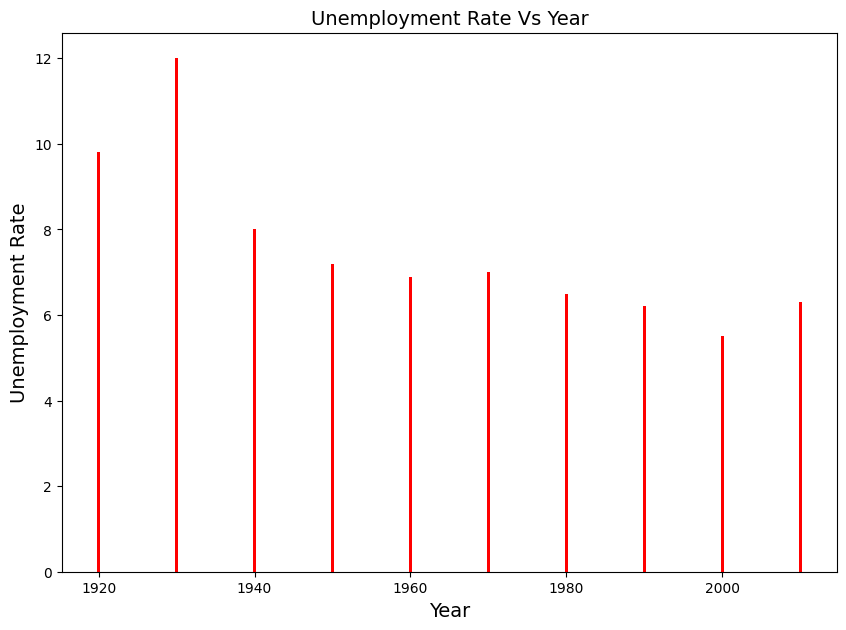

In [58]:
import PySimpleGUI as sg
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
   
year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
unemployment_rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
  
def create_bar_graph(year, unemployment_rate):
    plt.figure(figsize =(10, 7))
    plt.bar(year, unemployment_rate, color='red', width=0.4)
    plt.title('Unemployment Rate Vs Year', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Unemployment Rate', fontsize=14)
    return plt.gcf()

layout = [[sg.Text('Bar Graph')],
          [sg.Canvas(size=(1000, 1000), key='-CANVAS-')],
          [sg.Exit()]]

def draw_figure(canvas, figure):
    figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
    figure_canvas_agg.draw()
    figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
    return figure_canvas_agg


window = sg.Window('PySimpleGUI + MatPlotLib Bar Graphs', layout, finalize=True, element_justification='center')

draw_figure(window['-CANVAS-'].TKCanvas, create_bar_graph(year, unemployment_rate))

while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event == 'Exit':
        break

window.close()

In [63]:
import PySimpleGUI as sg

"""
    Restrict the characters allowed in an input element to digits and . or -
    Accomplished by removing last character input if not a valid character
"""

layout = [  [sg.Text('Input only floating point numbers')],
            [sg.Input(key='-IN-', enable_events=True)],
            [sg.Button('Exit')]  ]

window = sg.Window('Floating point input validation', layout)

while True:
    event, values = window.read()
    if event in (sg.WIN_CLOSED, 'Exit'):
        break
    # if last character in input element is invalid, remove it
    if event == '-IN-' and values['-IN-']:
        try:
            in_as_float = float(values['-IN-'])
        except:
            if len(values['-IN-']) == 1 and values['-IN-'][0] == '-':
                continue
            window['-IN-'].update(values['-IN-'][:-1])
window.close()


In [25]:
import PySimpleGUI as sg
# import PySimpleGUIQt as sg
import os.path
import PIL.Image
import io
import base64

"""
    Demo for displaying any format of image file.

    Normally tkinter only wants PNG and GIF files.  This program uses PIL to convert files
    such as jpg files into a PNG format so that tkinter can use it.

    The key to the program is the function "convert_to_bytes" which takes a filename or a 
    bytes object and converts (with optional resize) into a PNG formatted bytes object that
    can then be passed to an Image Element's update method.  This function can also optionally
    resize the image.

    Copyright 2020 PySimpleGUI.org
"""



def convert_to_bytes(file_or_bytes, resize=None):
    '''
    Will convert into bytes and optionally resize an image that is a file or a base64 bytes object.
    Turns into  PNG format in the process so that can be displayed by tkinter
    :param file_or_bytes: either a string filename or a bytes base64 image object
    :type file_or_bytes:  (Union[str, bytes])
    :param resize:  optional new size
    :type resize: (Tuple[int, int] or None)
    :return: (bytes) a byte-string object
    :rtype: (bytes)
    '''
    if isinstance(file_or_bytes, str):
        img = PIL.Image.open(file_or_bytes)
    else:
        try:
            img = PIL.Image.open(io.BytesIO(base64.b64decode(file_or_bytes)))
        except Exception as e:
            dataBytesIO = io.BytesIO(file_or_bytes)
            img = PIL.Image.open(dataBytesIO)

    cur_width, cur_height = img.size
    if resize:
        new_width, new_height = resize
        scale = min(new_height/cur_height, new_width/cur_width)
        img = img.resize((int(cur_width*scale), int(cur_height*scale)), PIL.Image.LANCZOS)
    bio = io.BytesIO()
    img.save(bio, format="PNG")
    del img
    return bio.getvalue()



# --------------------------------- Define Layout ---------------------------------

# First the window layout...2 columns

left_col = [[sg.Text('Folder'), sg.In(size=(25,1), enable_events=True ,key='-FOLDER-'), sg.FolderBrowse()],
            [sg.Listbox(values=[], enable_events=True, size=(40,20),key='-FILE LIST-')],
            [sg.Text('Resize to'), sg.In(key='-W-', size=(5,1)), sg.In(key='-H-', size=(5,1))]]

# For now will only show the name of the file that was chosen
images_col = [[sg.Text('You choose from the list:')],
              [sg.Text(size=(40,1), key='-TOUT-')],
              [sg.Image(key='-IMAGE-')]]

# ----- Full layout -----
layout = [[sg.Column(left_col, element_justification='c'), sg.VSeperator(),sg.Column(images_col, element_justification='c')]]

# --------------------------------- Create Window ---------------------------------
window = sg.Window('Multiple Format Image Viewer', layout,resizable=True)

# ----- Run the Event Loop -----
# --------------------------------- Event Loop ---------------------------------
while True:
    event, values = window.read()
    if event in (sg.WIN_CLOSED, 'Exit'):
        break
    if event == sg.WIN_CLOSED or event == 'Exit':
        break
    if event == '-FOLDER-':                         # Folder name was filled in, make a list of files in the folder
        folder = values['-FOLDER-']
        try:
            file_list = os.listdir(folder)         # get list of files in folder
        except:
            file_list = []
        fnames = [f for f in file_list if os.path.isfile(
            os.path.join(folder, f)) and f.lower().endswith((".png", ".jpg", "jpeg", ".tiff", ".bmp"))]
        window['-FILE LIST-'].update(fnames)
    elif event == '-FILE LIST-':    # A file was chosen from the listbox
        try:
            filename = os.path.join(values['-FOLDER-'], values['-FILE LIST-'][0])
            window['-TOUT-'].update(filename)
            if values['-W-'] and values['-H-']:
                new_size = int(values['-W-']), int(values['-H-'])
            else:
                new_size = None
            window['-IMAGE-'].update(data=convert_to_bytes(filename, resize=new_size))
        except Exception as E:
            print(f'** Error {E} **')
            pass        # something weird happened making the full filename
# --------------------------------- Close & Exit ---------------------------------
window.close()

In [36]:
import PySimpleGUI as sg

# https://github.com/PySimpleGUI/PySimpleGUI/issues/3772

tree_data = sg.TreeData()

sg.set_options(font=("Arial Bold",14))

data = [
   ["","BIO", "Biology", "", "", ""],
   ["BIO", "ADR", "Adrian", 97, 83, 92],
   ["BIO", "LIA", "Liam", 89, 91, 101],
   ["BIO", "CEL", "Celia", 101, 95, 102],
   ["","CHM", "Chemistry", "", "", ""],
   ["CHM", "ADR", "Adriam", 85, 91, 99],
   ["CHM", "LIA", "Liam", 86, 100, 92],
   ["CHM", "CEL", "Celia", 99, 101, 98]
]

headings = ['Quiz 1','Homework 1','Quiz 2']

for row in data:
   tree_data.Insert(row[0], row[1], row[2], row[3:])

layout = [
   [sg.Tree(
        data=tree_data,
        headings=headings,
        auto_size_columns=True,
        select_mode=sg.TABLE_SELECT_MODE_EXTENDED,
        num_rows=10,
        col0_width=5,
        key='-TREE-',
        show_expanded=True, # Shows already expanded out
        enable_events=True,
        expand_x=True,
        expand_y=True,
    )],
    [sg.Button('Insert')]
]

window=sg.Window("Gradebook", layout, size=(600, 300), resizable=True)

while True:
   event, values = window.read()
#    print ("event:",event, "values:",values)
   if event == sg.WIN_CLOSED:
      break
window.close()


In [39]:
import PySimpleGUI as sg

# Folowup to this video https://youtu.be/xZyqYJGjhFs
# https://www.pysimplegui.org/en/latest/call%20reference/#table-element
# To make this useful you need to save the data on exit. See https://youtu.be/BaIKzvZf-qk

td=[]
Headings=['Number','Text String','Combo Choice']

layout=[[sg.Text(Headings[0]),sg.Input(size=5,key=Headings[0])],
        [sg.Text(Headings[1]),sg.Input(size=20,key=Headings[1])],
        [sg.Text(Headings[2]),sg.Combo(['Red','Green','Blue'],key=Headings[2])],
        [sg.Button('Add Row'),sg.Button('Edit Row'),        # New buttons
            sg.Button('Save Edit',disabled=True),sg.Button('Delete Row'),sg.Exit()],
        [sg.Table(td,Headings,key='myTable')]]

window=sg.Window('PSG Tips',layout)

while True:
    event,values= window.read()
    # print (values)
    if event == 'Add Row':
        td.append([values[Headings[0]],values[Headings[1]],values[Headings[2]]])
        window['myTable'].update(values=td)
        for i in range(3):    # Loop thru to clear boxes
            window[Headings[i]].update(value='')
#########################  New code added between bars
    if event == 'Edit Row':
        if values['myTable']==[]:
            sg.popup('No Row Selected')
        else:
            editRow=values['myTable'][0]
            sg.popup('Edit Selected Row')
            for i in range(3):  
                window[Headings[i]].update(value=td[editRow][i])
            window['Save Edit'].update(disabled=False)
    if event == 'Save Edit':
        td[editRow]=[values[Headings[0]],values[Headings[1]],values[Headings[2]]]
        window['myTable'].update(values=td)
        for i in range(3):    # Loop thru to clear boxes
            window[Headings[i]].update(value='')
        window['Save Edit'].update(disabled=True)
    if event == 'Delete Row':
        if values['myTable']==[]:
            sg.popup('No Row Selected')
        else:
            if sg.popup_ok_cancel('Can not undo Delete: Continue?') == 'OK':
                del td[values['myTable'][0]]    # Removes the selected row
                window['myTable'].update(values=td)
#########################
    if event in (sg.WIN_CLOSED, 'Exit'):
        break
window.close()

In [41]:
import PySimpleGUI as sg

"""
    Demo - Element List

    All elements shown in 1 window as simply as possible.

    Copyright 2022 PySimpleGUI
"""


use_custom_titlebar = True if sg.running_trinket() else False

def make_window(theme=None):

    NAME_SIZE = 23

    def name(name):
        dots = NAME_SIZE-len(name)-2
        return sg.Text(name + ' ' + '•'*dots, size=(NAME_SIZE,1), justification='r',pad=(0,0), font='Courier 10')

    sg.theme(theme)

    # NOTE that we're using our own LOCAL Menu element
    if use_custom_titlebar:
        Menu = sg.MenubarCustom
    else:
        Menu = sg.Menu

    treedata = sg.TreeData()

    treedata.Insert("", '_A_', 'Tree Item 1', [1234], )
    treedata.Insert("", '_B_', 'B', [])
    treedata.Insert("_A_", '_A1_', 'Sub Item 1', ['can', 'be', 'anything'], )

    layout_l = [
                [name('Text'), sg.Text('Text')],
                [name('Input'), sg.Input(s=15)],
                [name('Multiline'), sg.Multiline(s=(15,2))],
                [name('Output'), sg.Output(s=(15,2))],
                [name('Combo'), sg.Combo(sg.theme_list(), default_value=sg.theme(), s=(15,22), enable_events=True, readonly=True, k='-COMBO-')],
                [name('OptionMenu'), sg.OptionMenu(['OptionMenu',],s=(15,2))],
                [name('Checkbox'), sg.Checkbox('Checkbox')],
                [name('Radio'), sg.Radio('Radio', 1)],
                [name('Spin'), sg.Spin(['Spin',], s=(15,2))],
                [name('Button'), sg.Button('Button')],
                [name('ButtonMenu'), sg.ButtonMenu('ButtonMenu', sg.MENU_RIGHT_CLICK_EDITME_EXIT)],
                [name('Slider'), sg.Slider((0,10), orientation='h', s=(10,15))],
                [name('Listbox'), sg.Listbox(['Listbox', 'Listbox 2'], no_scrollbar=True,  s=(15,2))],
                [name('Image'), sg.Image(sg.EMOJI_BASE64_HAPPY_THUMBS_UP)],
                [name('Graph'), sg.Graph((125, 50), (0,0), (125,50), k='-GRAPH-')]  ]

    layout_r  = [[name('Canvas'), sg.Canvas(background_color=sg.theme_button_color()[1], size=(125,40))],
                [name('ProgressBar'), sg.ProgressBar(100, orientation='h', s=(10,20), k='-PBAR-')],
                [name('Table'), sg.Table([[1,2,3], [4,5,6]], ['Col 1','Col 2','Col 3'], num_rows=2)],
                [name('Tree'), sg.Tree(treedata, ['Heading',], num_rows=3)],
                [name('Horizontal Separator'), sg.HSep()],
                [name('Vertical Separator'), sg.VSep()],
                [name('Frame'), sg.Frame('Frame', [[sg.T(s=15)]])],
                [name('Column'), sg.Column([[sg.T(s=15)]])],
                [name('Tab, TabGroup'), sg.TabGroup([[sg.Tab('Tab1',[[sg.T(s=(15,2))]]), sg.Tab('Tab2', [[]])]])],
                [name('Pane'), sg.Pane([sg.Col([[sg.T('Pane 1')]]), sg.Col([[sg.T('Pane 2')]])])],
                [name('Push'), sg.Push(), sg.T('Pushed over')],
                [name('VPush'), sg.VPush()],
                [name('Sizer'), sg.Sizer(1,1)],
                [name('StatusBar'), sg.StatusBar('StatusBar')],
                [name('Sizegrip'), sg.Sizegrip()]  ]

    # Note - LOCAL Menu element is used (see about for how that's defined)
    layout = [[Menu([['File', ['Exit']], ['Edit', ['Edit Me', ]]],  k='-CUST MENUBAR-',p=0)],
              [sg.T('PySimpleGUI Elements - Use Combo to Change Themes', font='_ 14', justification='c', expand_x=True)],
              [sg.Checkbox('Use Custom Titlebar & Menubar', use_custom_titlebar, enable_events=True, k='-USE CUSTOM TITLEBAR-', p=0)],
              [sg.Col(layout_l, p=0), sg.Col(layout_r, p=0)]]

    window = sg.Window('The PySimpleGUI Element List', layout, finalize=True, right_click_menu=sg.MENU_RIGHT_CLICK_EDITME_VER_EXIT, keep_on_top=True, use_custom_titlebar=use_custom_titlebar)

    window['-PBAR-'].update(30)                                                     # Show 30% complete on ProgressBar
    window['-GRAPH-'].draw_image(data=sg.EMOJI_BASE64_HAPPY_JOY, location=(0,50))   # Draw something in the Graph Element

    return window


window = make_window()

while True:
    event, values = window.read()
    # sg.Print(event, values)
    if event == sg.WIN_CLOSED or event == 'Exit':
        break
    if event == 'Edit Me':
        sg.execute_editor(__file__)
    if values['-COMBO-'] != sg.theme():
        sg.theme(values['-COMBO-'])
        window.close()
        window = make_window()
    if event == '-USE CUSTOM TITLEBAR-':
        use_custom_titlebar = values['-USE CUSTOM TITLEBAR-']
        sg.set_options(use_custom_titlebar=use_custom_titlebar)
        window.close()
        window = make_window()
    elif event == 'Version':
        sg.popup_scrolled(sg.get_versions(), __file__, keep_on_top=True, non_blocking=True)
window.close()



In [64]:
import PySimpleGUI as sg      

sg.theme('LightGreen')      
sg.set_options(element_padding=(0, 0))      

# ------ Menu Definition ------ #      
menu_def = [['File', ['Open', 'Save', 'Exit'  ]],      
            ['Edit', ['Paste', ['Special', 'Normal', ], 'Undo'], ],      
            ['Help', 'About...'], ]      

# ------ GUI Defintion ------ #      
layout = [      
    [sg.Menu(menu_def, )],      
    [sg.Output(size=(60, 20))]      
            ]      

window = sg.Window("Windows-like program", layout, default_element_size=(12, 1), auto_size_text=False, auto_size_buttons=False,      
                    default_button_element_size=(12, 1))      

# ------ Loop & Process button menu choices ------ #      
while True:      
    event, values = window.read()      
    if event == sg.WIN_CLOSED or event == 'Exit':      
        break      
    # print('Button = ', event)      
    # ------ Process menu choices ------ #      
    if event == 'About...':      
        sg.popup('About this program', 'Version 1.0', 'PySimpleGUI rocks...')      
    elif event == 'Open':      
        filename = sg.popup_get_file('file to open', no_window=True)      
        # print(filename)  
window.close()    

In [11]:
import ttkbootstrap as ttk
from ttkbootstrap.tableview import Tableview
from ttkbootstrap.constants import *

app = ttk.Window(themename="superhero")
colors = app.style.colors

coldata = [
    {"text": "LicenseNumber", "stretch": False},
    "CompanyName",
    {"text": "UserCount", "stretch": False},
]

rowdata = [
    ['A123', 'IzzyCo', 12],
    ('A136', 'Kimdee Inc.', 45),
    ('A158', 'Farmadding Co.', 36)
]

table = Tableview(
    master=app,
    coldata=coldata,
    rowdata=rowdata,
    paginated=True,
    pagesize=10, # Number of rows to show per page
    autofit=False, # Whether or not to automatically change the size of a column based on the existing data
    searchable=True,
    bootstyle=PRIMARY,
    stripecolor=(colors.light, None), # background, foreground
)

table.pack(fill=BOTH, expand=YES, padx=10, pady=10)

table.insert_row('end', ['Marzale LLC', 26])
table.load_table_data()

row = table.tablerows
print(row[1].values)

# table.delete_row(5)

app.mainloop()

['A136', 'Kimdee Inc.', 45]


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/carlitos/.local/lib/python3.10/site-packages/ttkbootstrap/tableview.py", line 1347, in sort_column_data
    sortedrows = sorted(
TypeError: '<' not supported between instances of 'int' and 'str'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/tkinter/__init__.py", line 1921, in __call__
    return self.func(*args)
  File "/home/carlitos/.local/lib/python3.10/site-packages/ttkbootstrap/tableview.py", line 2249, in _header_leftclick
    self.sort_column_data(event)
  File "/home/carlitos/.local/lib/python3.10/site-packages/ttkbootstrap/tableview.py", line 1355, in sort_column_data
    sortedrows = sorted(
  File "/home/carlitos/.local/lib/python3.10/site-packages/ttkbootstrap/tableview.py", line 1356, in <lambda>
    tablerows, reverse=columnsort, key=lambda x: int(x.values[index])
ValueError: invalid literal for int() with ba

KeyboardInterrupt: 

In [1]:
import PySimpleGUI as sg

def create_row(row_counter, row_number_view):
    row =  [sg.pin(
        sg.Col([[
            sg.Button("X", border_width=0, button_color=(sg.theme_text_color(), sg.theme_background_color()), key=('-DEL-', row_counter)),
            sg.Input(size=(20,1), key=('-DESC-', row_counter)),
            sg.Text(f'Row {row_number_view}', key=('-STATUS-', row_counter))]],
        key=('-ROW-', row_counter)
        ))]
    return row



layout = [  [sg.Text('Add and "Delete" Rows From a Window', font='15')],
            [sg.Column([create_row(0, 1)], k='-ROW_PANEL-')],
            [sg.Text("Exit", enable_events=True, key='-EXIT-', tooltip='Exit Application'),
            sg.Text("Refresh", enable_events=True, key='-REFRESH-', tooltip='Exit Application'),
            sg.Text('+', enable_events=True, k='-ADD_ITEM-', tooltip='Add Another Item')]]

window = sg.Window('Dynamically Adding Elements', 
    layout,  use_default_focus=False, font='15')

row_counter = 0
row_number_view = 1
while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event == '-EXIT-':
        break
    if event == '-ADD_ITEM-':
        row_counter += 1
        row_number_view += 1
        print("Actual Row Number: ", row_counter)
        print("Displayed Row Number: ", row_number_view)
        # Allows you to add items to a layout
        # These items cannot be deleted, but can be made invisible
        window.extend_layout(window['-ROW_PANEL-'], [create_row(row_counter, row_number_view)])
    elif event[0] == '-DEL-':
        row_number_view -= 1
        window[('-ROW-', event[1])].update(visible=False)
window.close()



Actual Row Number:  1
Displayed Row Number:  2
Actual Row Number:  2
Displayed Row Number:  3
Actual Row Number:  3
Displayed Row Number:  4
Actual Row Number:  4
Displayed Row Number:  2


In [2]:
import tkinter as tk
from tkinter import *
import re

root = tk.Tk()
root.geometry("600x100")  # Size of the window 
root.title("Validation Example")  # Adding a title

def validate_email(email_input):
    regex = '^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}$'
    if(re.search(regex,email_input) and email_input.isalpha):
        email_validation_label.config(text="")
        submit_button.config(state='active')  
        return True        
    else:
        email_validation_label.config(text="Email invalid", foreground="red")
        submit_button.config(state='disabled') 
        return False  

def validate_name(name_input):
    # Accepts multiword names
    # No special symbols or numbers
    regex = "^[\-'a-zA-Z ]+$"
    if(re.search(regex,name_input)):
        name_validation_label.config(text="")
        submit_button.config(state='active')
        return True
    else:
        name_validation_label.config(text="Name invalid", foreground="red")
        submit_button.config(state='disabled') 
        return False
   
email_valid = root.register(validate_email)
email_validation_label = tk.Label(root)
email_validation_label.grid(row=2, column=2, pady=10)

email_label=tk.Label(root,text='Email')
email_label.grid(row=1,column=1,padx=5,pady=10)
# focus, focusin, focusout, key, all, none
# focus tried to validate whenever field gains or loses focus
email_field = Entry(root,validate='focus',validatecommand=(email_valid,'%P'))
email_field.grid(row=1,column=2,padx=10)


name_valid = root.register(validate_name)
name_validation_label = tk.Label(root)
name_validation_label.grid(row=2, column=4, pady=10)

name_label=tk.Label(root,text='Name')
name_label.grid(row=1,column=3,padx=5, pady=10)
name_field = tk.Entry(root, validate='focus', validatecommand=(name_valid, '%P'))
name_field.grid(row=1,column=4, padx=10)


submit_button = tk.Button(root,text='Submit')
submit_button.grid(row=1,column=5)

root.mainloop()  # Keep the window open

KeyboardInterrupt: 

In [2]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

data = {'year': [192, 1930, 190, 950, 1960, 1970, 1980, 1990, 2000, 2010],
         'unemployment_rate': [9.8, 12, 8, 7.2, 6.9, 7, 6.5, 6.2, 5.5, 6.3]
         }  
dataframe = pd.DataFrame(data)

main_window = tk.Tk()

# Creates a new figure - a container for the actual plot
# Figsize is width/height in inches
figure = plt.Figure(figsize=(5, 4), dpi=100)
# Adds an axes to the figure
# Input is number of rows, number of cols, index position
# Assumes a grid layout
figure_plot = figure.add_subplot(1, 1, 1)
figure_plot.set_ylabel('Unemployment Rate')
# Place figure on main window
line = FigureCanvasTkAgg(figure, main_window)
# get_tk_widget
line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
# Meant for actual dates - groups unemployment rates by year and adds them up
dataframe = dataframe[['year', 'unemployment_rate']].groupby('year').sum()
dataframe.plot(kind='line', legend=True, ax=figure_plot, color='r', marker='o', fontsize=10)
figure_plot.set_title('Year Vs. Unemployment Rate')

main_window.mainloop()

In [3]:
import PySimpleGUI as sg
from random import randint

GRAPH_SIZE = (400,200)
GRAPH_STEP_SIZE = 5

sg.change_look_and_feel('LightGreen')
# Graph element(canvas_size, graph_bottom_left, graph_top_right)
layout = [  [sg.Graph(GRAPH_SIZE, (0,0), GRAPH_SIZE, key='-GRAPH-', background_color='lightblue'),],
            [sg.Text('Milliseconds per sample:', size=(20,1)),
             sg.Slider((0,30), default_value=15, orientation='h', key='-DELAY-')],
            [sg.Text('Pixels per sample:', size=(20,1)),
             sg.Slider((1,30), default_value=GRAPH_STEP_SIZE, orientation='h', key='-STEP-SIZE-')],
            [sg.Button('Exit')]]

window = sg.Window('Animated Line Graph Example', layout)

delay = x = lastx = lasty = 0
while True:                             # Event Loop
    # Each graph movement is happening in the span of the delay (in milliseconds)
    event, values = window.read(timeout=delay)
    if event in (None, 'Exit'):
        break
    step_size, delay = values['-STEP-SIZE-'], values['-DELAY-']
    y = randint(0,GRAPH_SIZE[1])        # get random y coordinate for graph
    if x < GRAPH_SIZE[0]:               # if still drawing initial width of graph, meaning less than 400
        # Draw line from initial lastx, lasty, to current
        window['-GRAPH-'].DrawLine((lastx, lasty), (x, y), width=1)
    else:
                                       # finished drawing full graph width so move each time to make room
        # Effectively move current graph backwards, so that earlier drawn part is out of view
        print(step_size)
        print(x)
        window['-GRAPH-'].Move(-step_size, 0)
        # Once graph has been moved backwards, draw new line from last (x, y) coordinate
        window['-GRAPH-'].DrawLine((lastx, lasty), (x, y), width=1)
        # Reduce x by step size to move graph forward 
        # (basically, keep x will have the step size added to it later, so this keeps it the same)
        x -= step_size
        print(x)
    lastx, lasty = x, y
    # Move graph forward or keep at same place depending on position
    x += step_size
window.close()

5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.0
395.0
5.0
400.

In [1]:
import PySimpleGUI as sg
import math

sg.change_look_and_feel('DarkAmber')

layout = [[sg.Text("Enter radius in centimeters"), sg.Input(key='-RADIUS-', do_not_clear=True, size=(5, 1))],
          [sg.Text(size=(20, 1), justification='right', key='-OUT-CALCULATION-'),
           sg.Text(' centimeters squared')],
          [sg.Button('Calculate Volume'), sg.Button('Quit')]]

window = sg.Window('Calculate Sphere Volume', layout, size=(500, 100))

while True:
    event, values = window.read()
    if event in (None, 'Quit'):
        break
    elif event == 'Calculate Volume':
        radius = float(values['-RADIUS-'])
        volume = (4/3)*math.pi*(radius**3)
        print(volume)
        window['-OUT-CALCULATION-'].Update(volume)
        
window.close()

7238.229473870882
8005785573.355638
8005785573.355638
8005785573.355638
8005785573.355638
8005785573.355638
8005785573.355638
8005785573.355638
